In [227]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm, describe

In [228]:
# Задаем параметры и генерируем выборку
mu, sigma = 2, 3
n = 100
q = 1.4
k = int(1 + math.log2(n))  # Правило Стерджеса для числа интервалов
sample = np.random.normal(mu, sigma, n)

In [229]:
# 1.1 Интервальный ряд абсолютных частот
count, bins_edges = np.histogram(sample, bins=k)
print("Абсолютные частоты:", count)
print("Границы интервалов:", bins_edges)
print("Сумма абсолютных частот:", sum(count))

Абсолютные частоты: [ 6 20 20 20 20  6  8]
Границы интервалов: [-3.75467432 -1.91619422 -0.07771412  1.76076598  3.59924608  5.43772618
  7.27620628  9.11468638]
Сумма абсолютных частот: 100


In [230]:
# 1.2 Интервальный ряд относительных частот
count_rel, bins_edges_rel = np.histogram(sample, bins=k, density=True)
interval_width = bins_edges_rel[1] - bins_edges_rel[0]
print("Относительные частоты:", count_rel)
print("Сумма относительных частот:", sum(count_rel * interval_width))
print("Длина интервала: ", interval_width)

Относительные частоты: [0.03263565 0.10878551 0.10878551 0.10878551 0.10878551 0.03263565
 0.04351421]
Сумма относительных частот: 0.9999999999999999
Длина интервала:  1.8384801008499407


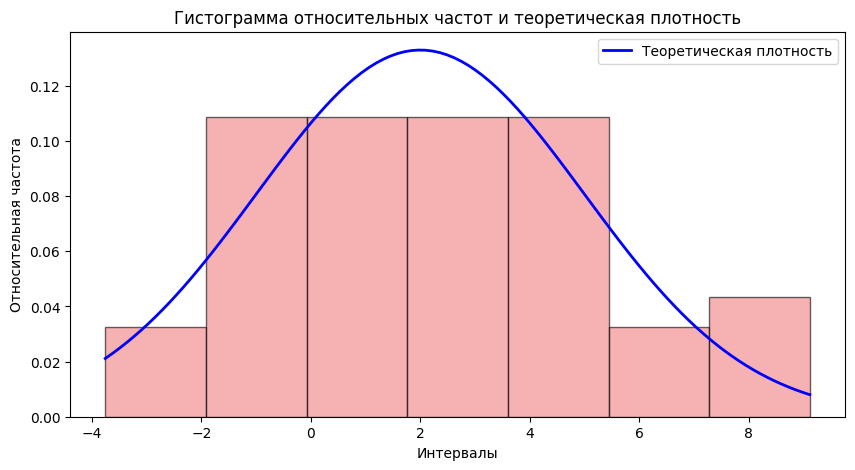

In [231]:
# 2.1 Гистограмма относительных частот и теоретическая кривая распределения
plt.figure(figsize=(10, 5))
plt.hist(sample, bins=k, density=True, color="lightcoral", edgecolor="black", alpha=0.6)
x_vals = np.linspace(min(bins_edges), max(bins_edges), 100)
y_vals = norm.pdf(x_vals, mu, sigma)
plt.plot(x_vals, y_vals, color="blue", linewidth=2, label="Теоретическая плотность")
plt.title("Гистограмма относительных частот и теоретическая плотность")
plt.xlabel("Интервалы")
plt.ylabel("Относительная частота")
plt.legend()
plt.show()

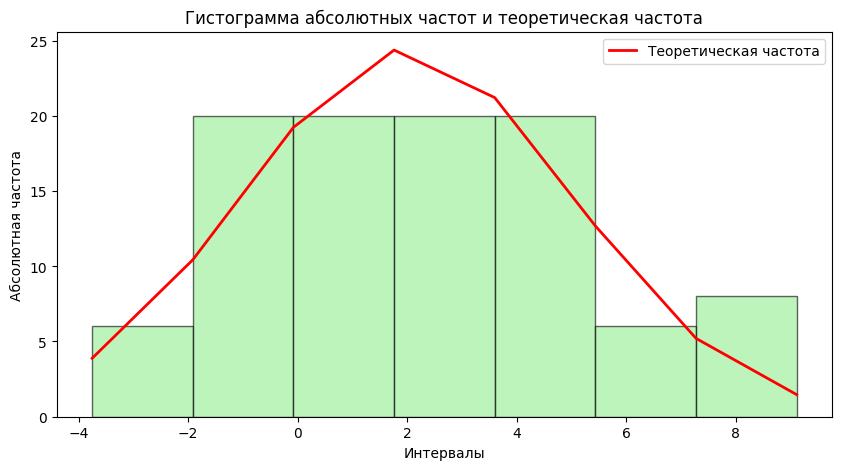

In [232]:
# 2.2 Гистограмма абсолютных частот и график теоретической частоты
plt.figure(figsize=(10, 5))
count_abs, bins_edges_abs, _ = plt.hist(sample, bins=k, color="lightgreen", edgecolor="black", alpha=0.6)
avs = norm.pdf(bins_edges_abs, mu, sigma) * n * interval_width
plt.plot(bins_edges_abs, avs, color="red", linewidth=2, label="Теоретическая частота")
plt.title("Гистограмма абсолютных частот и теоретическая частота")
plt.xlabel("Интервалы")
plt.ylabel("Абсолютная частота")
plt.legend()
plt.show()

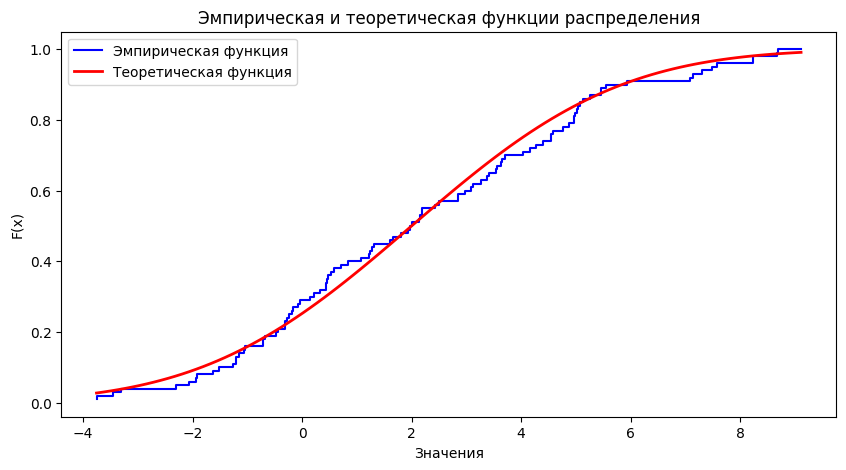

In [233]:
# 2.3 Эмпирическая и теоретическая функции распределения
plt.figure(figsize=(10, 5))
sorted_sample = np.sort(sample)
empirical_cdf = np.arange(1, n+1) / n
plt.step(sorted_sample, empirical_cdf, color="blue", label="Эмпирическая функция")
plt.plot(x_vals, norm.cdf(x_vals, mu, sigma), color="red", linewidth=2, label="Теоретическая функция")
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения")
plt.ylabel("F(x)")
plt.legend()
plt.show()

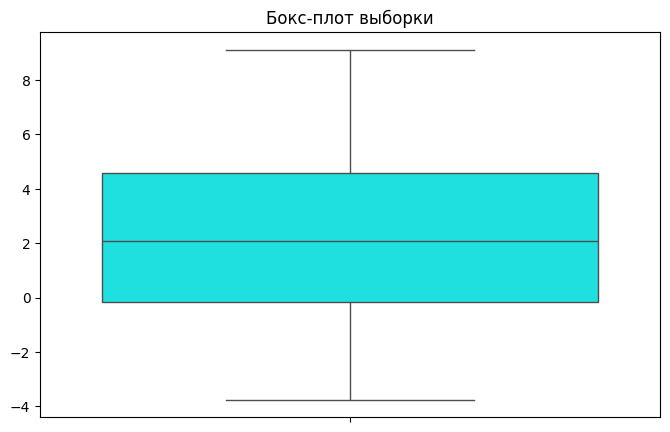

In [234]:
# 2.4 Бокс-плот выборки
plt.figure(figsize=(8, 5))
box_plot = sb.boxplot(sample, color="cyan")
plt.title("Бокс-плот выборки")
plt.show()

In [235]:
# 3.1 Вероятность события {|X - M(X)| < q * σ(X)}
# Находим значение с использованием функции Лапласа: 2Ф(q) = 2Ф(q) = 0.4192 * 2 = 0.8384
norm.cdf(bins_edges_abs[k], mu, sigma)
print(np.sum(sample < bins_edges_abs[7])/n)


0.99


In [236]:
# 3.2 Оценка вероятности по выборке
p_sample_estimate = np.sum(np.abs(sample - np.mean(sample)) < q * np.std(sample)) / n
print("Эмпирическая вероятность:", p_sample_estimate)

Эмпирическая вероятность: 0.84


In [237]:
# 3.3 Увеличение объема выборки и повторное вычисление эмпирической вероятности
large_sample = np.random.normal(mu, sigma, 50 * n)
p_large_sample_estimate = np.sum(np.abs(large_sample - np.mean(large_sample)) < q * np.std(large_sample)) / (50 * n)
print("Эмпирическая вероятность с увеличенным объемом выборки:", p_large_sample_estimate)

Эмпирическая вероятность с увеличенным объемом выборки: 0.8372


In [238]:
# 4.1 и 4.2 Точечные оценки параметров распределения
mean_estimate = np.sum(sample) / n
variance_estimate = np.sum((sample-mean_estimate) ** 2) / (n-1)
std_dev_estimate = np.sqrt(variance_estimate)
skewness_estimate = ((sample - mean_estimate) ** 3).mean() / (std_dev_estimate**3)
kurtosis_estimate = ((sample - mean_estimate) ** 4).mean() / (std_dev_estimate**4) - 3

In [239]:
print("Оценка мат. ожидания:", mean_estimate)
print("Дисперсия:", variance_estimate)
print("Стандартное отклонение:", std_dev_estimate)
print("Асимметрия:", skewness_estimate)
print("Эксцесс:", kurtosis_estimate)

Оценка мат. ожидания: 2.2805924917688865
Дисперсия: 9.113304674970191
Стандартное отклонение: 3.0188250487516153
Асимметрия: 0.2756527531622594
Эксцесс: -0.6635838654125159


In [240]:
# 4.2 Использование встроенной функции describe для оценки параметров
desc_stats = describe(sample)
print("Результаты describe():")
print("Оценка мат. ожидания", desc_stats.mean)
print("Дисперсия:", desc_stats.variance)
print("Ассиметрия:", desc_stats.skewness)
print("Эксцесс:", desc_stats.kurtosis)

Результаты describe():
Оценка мат. ожидания 2.2805924917688865
Дисперсия: 9.113304674970191
Ассиметрия: 0.27983983920038796
Эксцесс: -0.6161451539766509


In [241]:
# Повторное вычисление с увеличенным объемом выборки
large_mean_estimate = np.mean(large_sample)
large_variance_estimate = np.var(large_sample, ddof=1)
large_skewness_estimate = ((large_sample - large_mean_estimate) ** 3).mean() / np.std(large_sample)**3
large_kurtosis_estimate = ((large_sample - large_mean_estimate) ** 4).mean() / np.std(large_sample)**4 - 3

print("Оценки для увеличенной выборки:")
print("Оценка мат. ожидания:", large_mean_estimate)
print("Дисперсия:", large_variance_estimate)
print("Ассиметрия:", large_skewness_estimate)
print("Эксцесс:", large_kurtosis_estimate)

Оценки для увеличенной выборки:
Оценка мат. ожидания: 2.017193087669083
Дисперсия: 8.948753318264753
Ассиметрия: 0.01802176660211671
Эксцесс: 0.05426758703424639
